In [34]:
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'C:/Users/HP/Desktop/PFE/final-2/data.rar'

path_to_zip = tf.keras.utils.get_file('C:/Users/HP/Desktop/PFE/final-2/data.rar', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'C:/Users/HP/Desktop/PFE/final-2/data')


In [46]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [47]:
train_covid_dir = os.path.join(train_dir, 'covid')  # directory with our training covid pictures
train_normal_dir = os.path.join(train_dir, 'normal')  # directory with our training normal pictures
validation_covid_dir = os.path.join(validation_dir, 'covid')  # directory with our validation covid pictures
validation_normal_dir = os.path.join(validation_dir, 'normal')  # directory with our validation normal pictures

In [48]:
num_covid_tr = len(os.listdir(train_covid_dir))
num_normal_tr = len(os.listdir(train_normal_dir))

num_covid_val = len(os.listdir(validation_covid_dir))
num_normal_val = len(os.listdir(validation_normal_dir))

total_train = num_covid_tr + num_normal_tr
total_val = num_covid_val + num_normal_val

In [49]:
print('total training covid images:', num_covid_tr)
print('total training normal images:', num_normal_tr)

print('total validation covid images:', num_covid_val)
print('total validation normal images:', num_normal_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training covid images: 25
total training normal images: 25
total validation covid images: 25
total validation normal images: 25
--
Total training images: 50
Total validation images: 50


In [50]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [51]:
# Data preparation

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [53]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 50 images belonging to 2 classes.


In [54]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 50 images belonging to 2 classes.


In [55]:
# Visualize training images
sample_training_images, _ = next(train_data_gen)

In [56]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

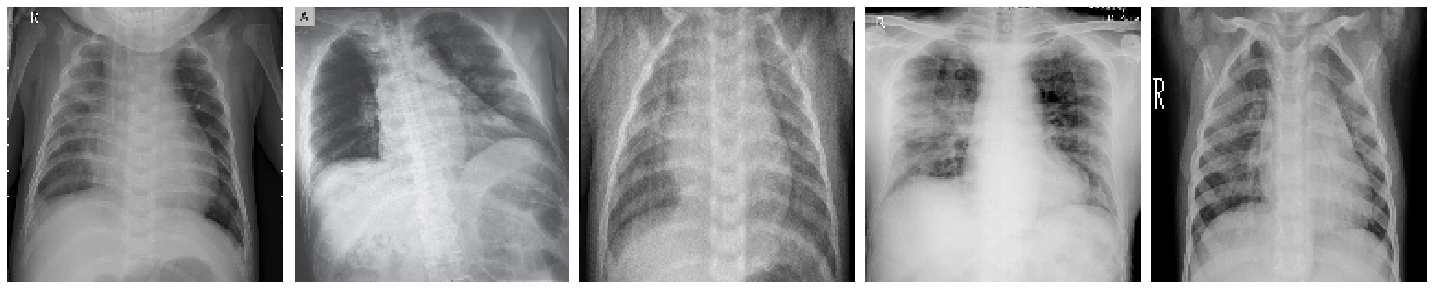

In [45]:
plotImages(sample_training_images[:5])

In [57]:
# Create the model

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [58]:
# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [61]:
# Train the model

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1 steps, validate for 1 steps
Epoch 1/15
1/1 [==============================] - 5s 5s/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 2/15
1/1 [==============================] - 5s 5s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 3/15
1/1 [==============================] - 5s 5s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4/15
1/1 [==============================] - 5s 5s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/15
1/1 [==============================] - 5s 5s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 5s 5s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 8.3268e-04 - val_accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 5s 5s/step - loss: 8.3268e-04 - ac

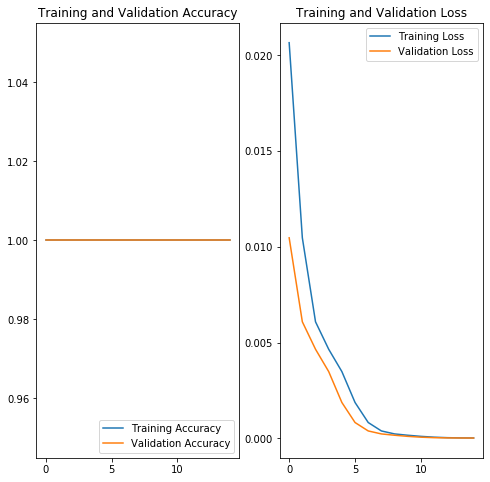

In [62]:
# Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()